In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sc_func import *

## 数据导入

In [172]:
data_form = pd.read_csv('D:\\python\\huabao\\tmp_score_huabao_variable0316_6.csv')

In [173]:
data_form.shape

(29322, 35)

In [174]:
x_columns = [x for x in data_form.columns if x not in ['type']]
keep_list = x_columns
target = 'type'

In [175]:
#样本的bad_rate
data_form[data_form['type']==1].shape[0]/data_form.shape[0]

0.08638564900075028

## 变量筛选

In [6]:
#相关性删除
df=data_form
corr=df.corr()

In [7]:
corr.columns

Index(['type', 'cs', 'ls_od_b_6m', 'ls_od_b_1y', 'ls_od_b_2y', 'ls_od_f_1t',
       'ls_od_f_3t', 'ls_od_f_6t', 'xc_behavior', 'xc_overloan', 'xc_overdue',
       'xc_record', 'rv', 'rc_idname_multi', 'rc_relation_age',
       'rc_relation_cnt_name_phone', 'rc_relation_multi', 'rc_relation_cnt',
       'ls_cr', 'ls_cr_cl', 'ls_gp', 'ls_gp_cl', 'ls_nw', 'ls_nd', 'ld_od',
       'ld_rc', 'ld_xc', 'bs_gps5', 'bs_add5', 'bd_addr_abn_apply',
       'bd_gps5_abn_apply', 'bd_addr_abn_spend', 'bd_gps5_abn_spend',
       'dist_gps5_abn_beh', 'dist_gps5_abn_spend'],
      dtype='object')

In [8]:
type(corr.columns)

pandas.indexes.base.Index

In [9]:
x_columns = [x for x in corr.columns if x not in ['type']]
x_columns

['cs',
 'ls_od_b_6m',
 'ls_od_b_1y',
 'ls_od_b_2y',
 'ls_od_f_1t',
 'ls_od_f_3t',
 'ls_od_f_6t',
 'xc_behavior',
 'xc_overloan',
 'xc_overdue',
 'xc_record',
 'rv',
 'rc_idname_multi',
 'rc_relation_age',
 'rc_relation_cnt_name_phone',
 'rc_relation_multi',
 'rc_relation_cnt',
 'ls_cr',
 'ls_cr_cl',
 'ls_gp',
 'ls_gp_cl',
 'ls_nw',
 'ls_nd',
 'ld_od',
 'ld_rc',
 'ld_xc',
 'bs_gps5',
 'bs_add5',
 'bd_addr_abn_apply',
 'bd_gps5_abn_apply',
 'bd_addr_abn_spend',
 'bd_gps5_abn_spend',
 'dist_gps5_abn_beh',
 'dist_gps5_abn_spend']

In [10]:
corr[abs(corr)>0.5]

,type,cs,ls_od_b_6m,ls_od_b_1y,ls_od_b_2y,ls_od_f_1t,ls_od_f_3t,ls_od_f_6t,xc_behavior,xc_overloan,...,ld_rc,ld_xc,bs_gps5,bs_add5,bd_addr_abn_apply,bd_gps5_abn_apply,bd_addr_abn_spend,bd_gps5_abn_spend,dist_gps5_abn_beh,dist_gps5_abn_spend
type,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cs,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_b_6m,NaN,NaN,1.000000,0.545897,NaN,NaN,0.819558,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_b_1y,NaN,NaN,0.545897,1.000000,0.548319,NaN,NaN,0.653162,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_b_2y,NaN,NaN,NaN,0.548319,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_f_1t,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_f_3t,NaN,NaN,0.819558,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_f_6t,NaN,NaN,NaN,0.653162,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xc_behavior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xc_overloan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## VAR BINNING RESULT 变量分组结果

In [6]:
#先平均分组看各变量的IV值
num_iv = pd.Series()
columns=list(data_form.columns)
for c in range(1,len(columns)):
         num_iv = num_iv.append(variable_binning(data_form, target,columns[c], 5,'iv'))
print(num_iv)

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = df[var].apply(lambda x: map_dict[x])


cs                            1.249039e-03
ls_od_b_6m                    4.061105e-27
ls_od_b_1y                    4.061105e-27
ls_od_b_2y                    4.061105e-27
ls_od_f_1t                    4.061105e-27
ls_od_f_3t                    4.061105e-27
ls_od_f_6t                    4.061105e-27
xc_behavior                   4.061105e-27
xc_overloan                   1.583521e-01
xc_overdue                    4.061105e-27
xc_record                     4.061105e-27
rv                            4.061105e-27
rc_idname_multi               4.061105e-27
rc_relation_age               4.061105e-27
rc_relation_cnt_name_phone    4.061105e-27
rc_relation_multi             4.061105e-27
rc_relation_cnt               4.061105e-27
ls_cr                         4.061105e-27
ls_cr_cl                      1.683890e-01
ls_gp                         4.061105e-27
ls_gp_cl                      4.061105e-27
ls_nw                         4.061105e-27
ls_nd                         4.061105e-27
ld_od      

## 逐个变量分组观察IV、占比、分组比例

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


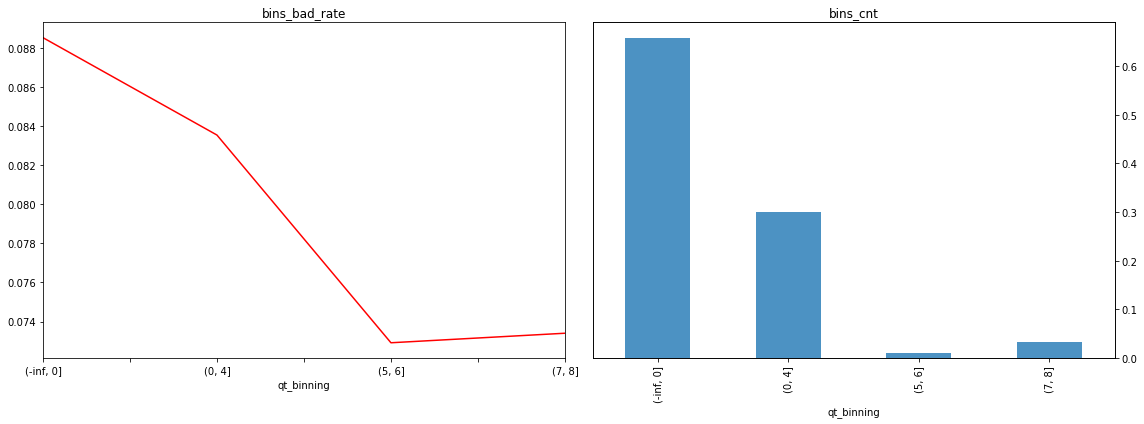

cs 变量的IV值为 0.0021148399183208142


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,19272,0.657254,1706,17566,0.673510,0.655717,0.088522,0.026773,0.000476
"(0, 4]",3,4,8822,0.300866,737,8085,0.290959,0.301803,0.083541,-0.036591,0.000397
"(5, 6]",6,6,288,0.009822,21,267,0.008291,0.009967,0.072917,-0.184139,0.000309
"(7, 8]",8,8,940,0.032058,69,871,0.027240,0.032513,0.073404,-0.176948,0.000933


In [12]:
var_name = 'cs' #变量
var_bin = variable_binning(data_form, target, var_name, [0,4,5,6,7,8], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_cs=var_bin['WOE']
var_bin.sort_values('Lbound')


C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


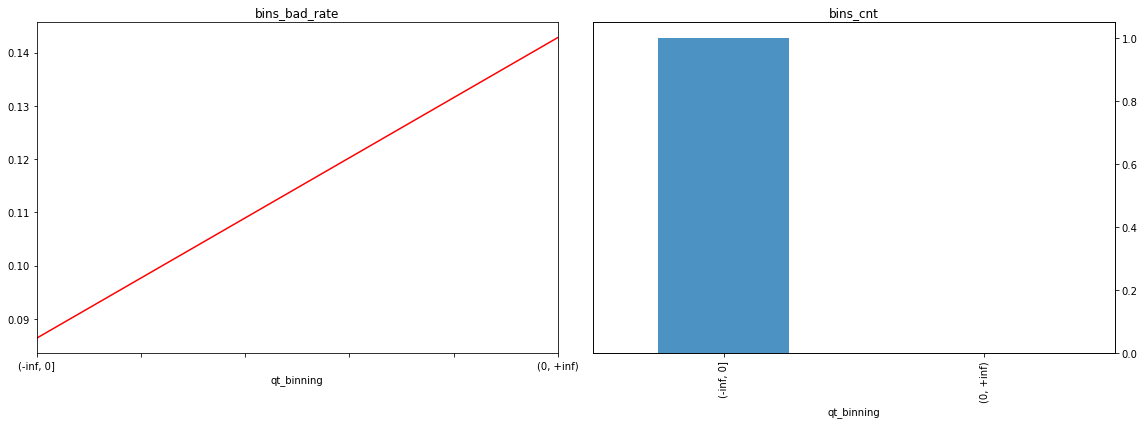

ls_od_b_2y 变量的IV值为 0.0002907329197208999


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,29301,0.999284,2530,26771,0.998816,0.999328,0.086345,-0.000513,2.628477e-07
"(0, +inf)",1,1,21,0.000716,3,18,0.001184,0.000672,0.142857,0.566828,2.904701e-04


In [13]:
var_name = 'ls_od_b_2y' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_od=var_bin['WOE']
var_bin.sort_values('Lbound')


C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


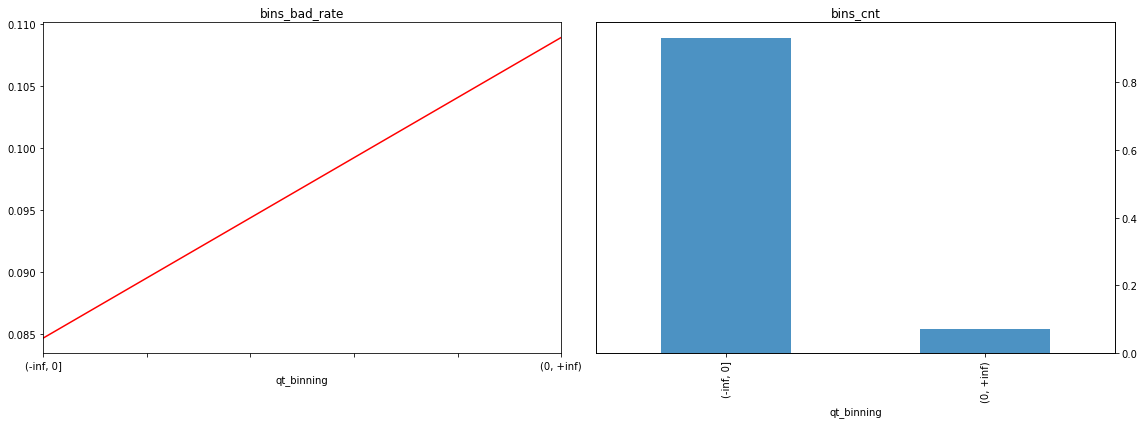

xc_behavior 变量的IV值为 0.005567257848582282


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,27265,0.929848,2309,24956,0.911567,0.931576,0.084687,-0.021713,0.000434
"(0, +inf)",1,1,2057,0.070152,224,1833,0.088433,0.068424,0.108896,0.256524,0.005133


In [14]:
var_name = 'xc_behavior' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_xc_behavior=var_bin['WOE']
var_bin.sort_values('Lbound')


C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


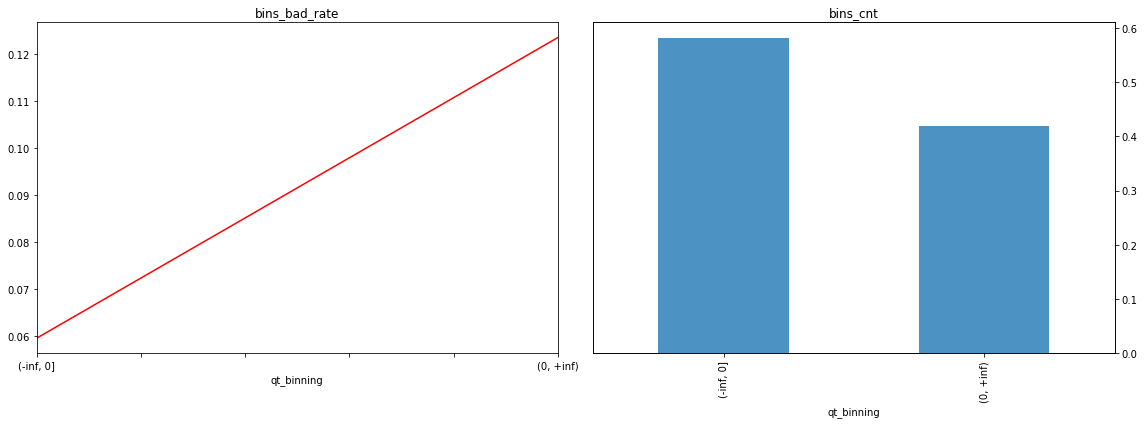

xc_overloan 变量的IV值为 0.15835213401876436


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,17033,0.580895,1014,16019,0.400316,0.597969,0.059531,-0.401286,0.079316
"(0, +inf)",1,1,12289,0.419105,1519,10770,0.599684,0.402031,0.123606,0.399875,0.079037


In [15]:
var_name = 'xc_overloan' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_xc_overloan=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


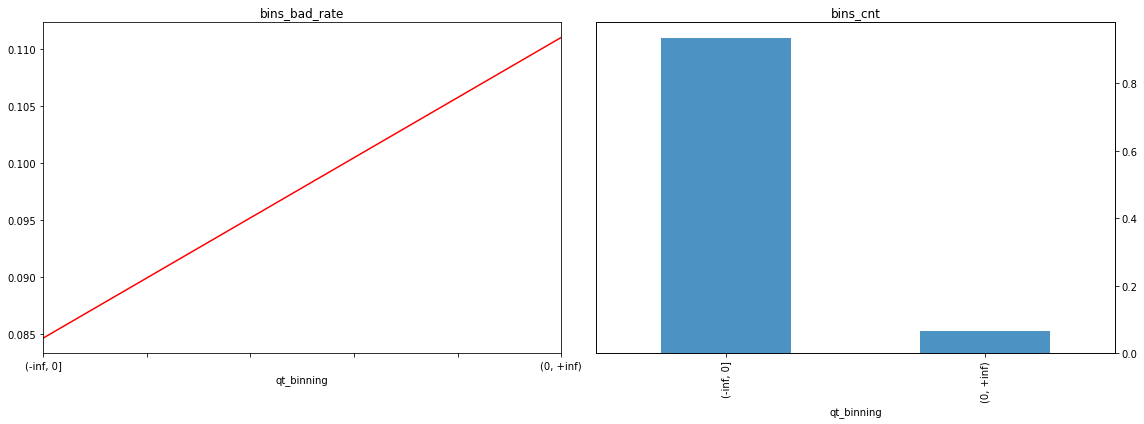

xc_overdue 变量的IV值为 0.006240199135400683


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,27377,0.933668,2317,25060,0.914726,0.935459,0.084633,-0.022413,0.000465
"(0, +inf)",1,1,1945,0.066332,216,1729,0.085274,0.064541,0.111054,0.278567,0.005776


In [16]:
var_name = 'xc_overdue' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_xc_overdue=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


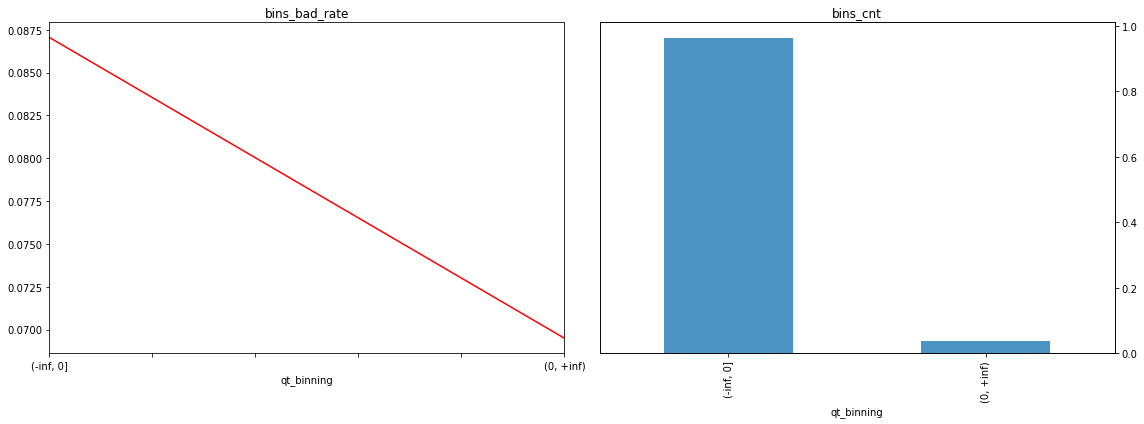

xc_record 变量的IV值为 0.0019754448753582423


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,28214,0.962213,2456,25758,0.969601,0.961514,0.087049,0.008376,0.000068
"(0, +inf)",1,1,1108,0.037787,77,1031,0.030399,0.038486,0.069495,-0.235892,0.001908


In [17]:
var_name = 'xc_record' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_xc_record=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


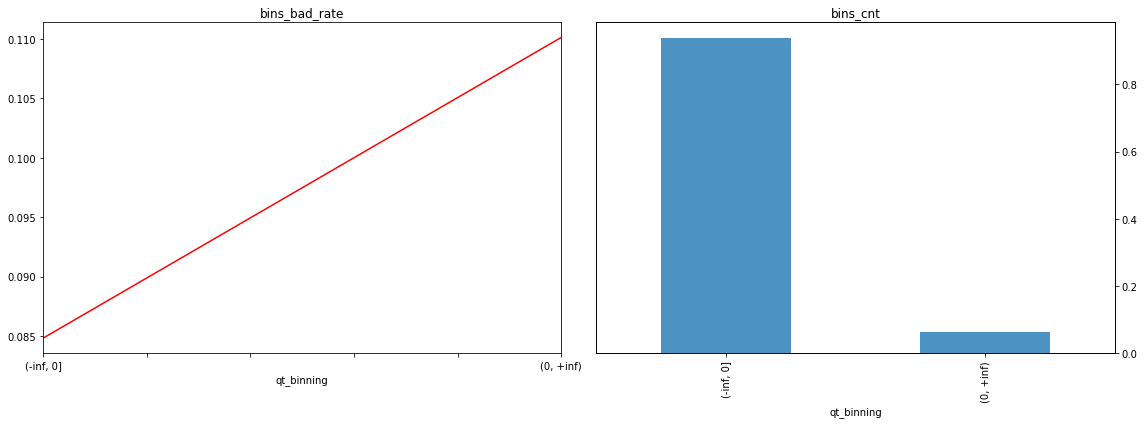

rv 变量的IV值为 0.005420373812069429


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,27497,0.93776,2332,25165,0.920647,0.939378,0.084809,-0.020141,0.000377
"(0, +inf)",1,1,1825,0.06224,201,1624,0.079353,0.060622,0.110137,0.269244,0.005043


In [18]:
var_name = 'rv' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_rv=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


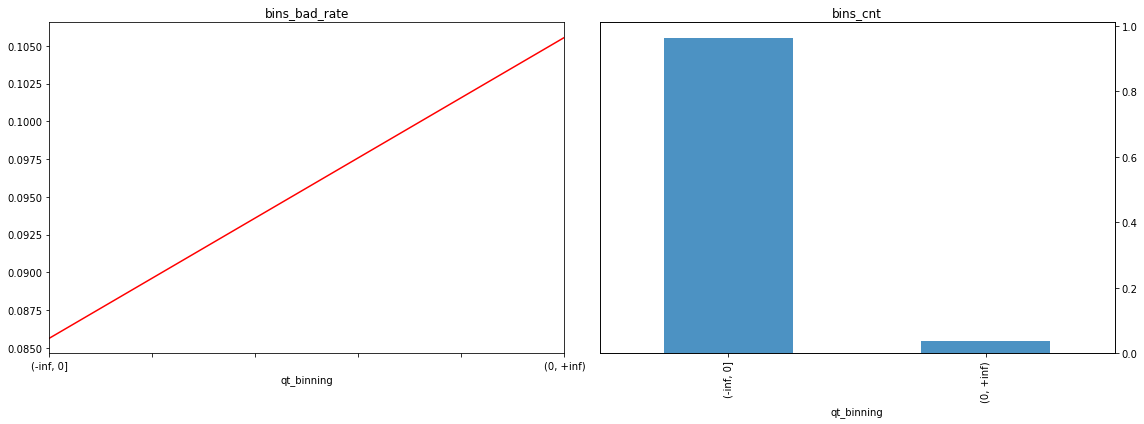

rc_relation_cnt 变量的IV值为 0.0021029632400767556


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,28223,0.96252,2417,25806,0.954205,0.963306,0.085639,-0.009493,0.000086
"(0, +inf)",1,1,1099,0.03748,116,983,0.045795,0.036694,0.105551,0.221568,0.002017


In [19]:
var_name = 'rc_relation_cnt' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


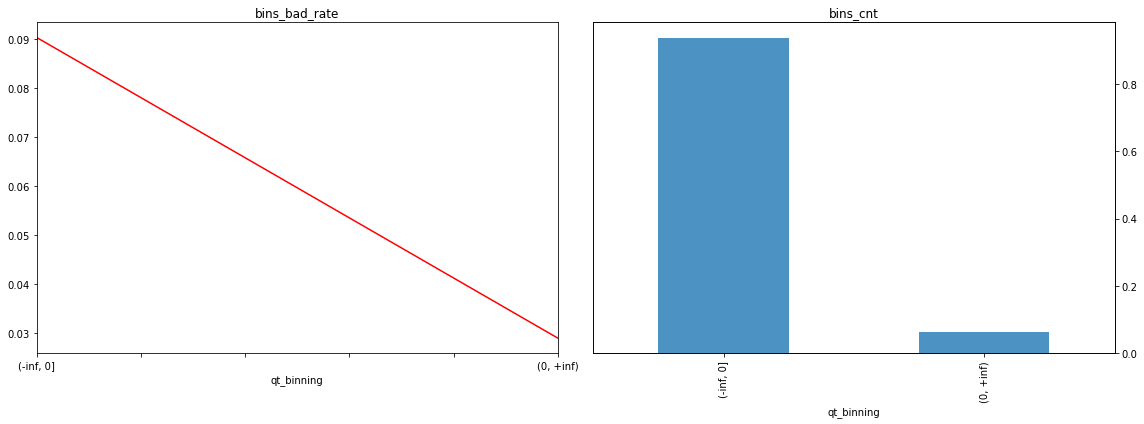

ls_cr 变量的IV值为 0.05572903156248731


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,27456,0.936362,2479,24977,0.978681,0.93236,0.090290,0.048487,0.002246
"(0, +inf)",1,1,1866,0.063638,54,1812,0.021319,0.06764,0.028939,-1.154615,0.053483


In [20]:
var_name = 'ls_cr' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_cr=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


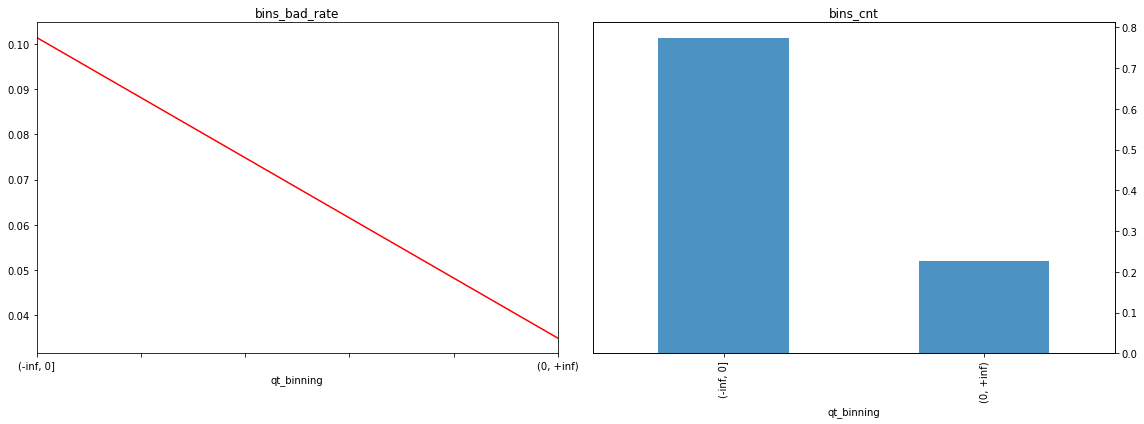

ls_cr_cl 变量的IV值为 0.1683890230992339


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,22675,0.77331,2301,20374,0.908409,0.760536,0.101477,0.177671,0.026273
"(0, +inf)",1,1,6647,0.22669,232,6415,0.091591,0.239464,0.034903,-0.961070,0.142116


In [21]:
var_name = 'ls_cr_cl' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_cr_cl=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


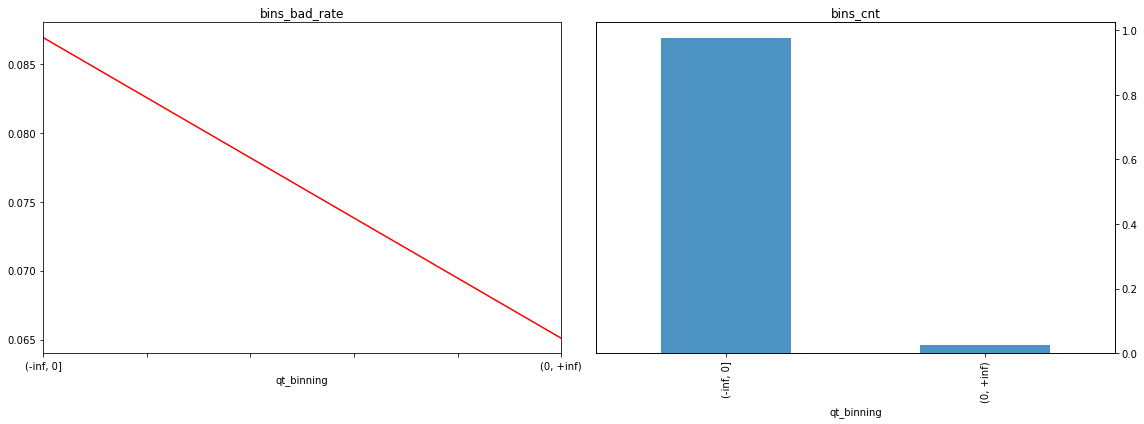

ls_gp 变量的IV值为 0.002077357215859834


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,28600,0.975377,2486,26114,0.981445,0.974803,0.086923,0.006790,0.000045
"(0, +inf)",1,1,722,0.024623,47,675,0.018555,0.025197,0.065097,-0.305978,0.002032


In [22]:
var_name = 'ls_gp' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_gp=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


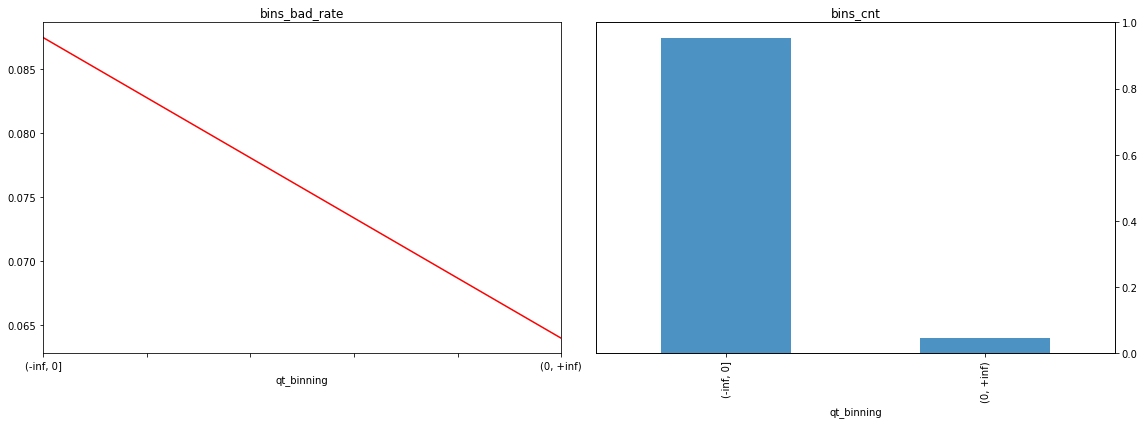

ls_gp_cl 变量的IV值为 0.004558023580223598


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,27931,0.952561,2444,25487,0.964864,0.951398,0.087501,0.014055,0.000189
"(0, +inf)",1,1,1391,0.047439,89,1302,0.035136,0.048602,0.063983,-0.324433,0.004369


In [23]:
var_name = 'ls_gp_cl' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_gp_cl=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


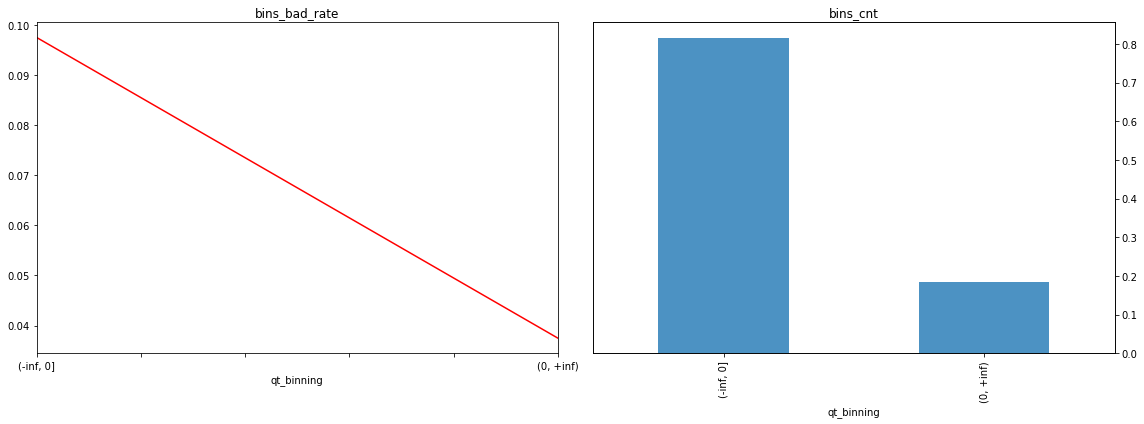

ls_nd 变量的IV值为 0.11687144896599692


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,23904,0.815224,2330,21574,0.919858,0.805331,0.097473,0.132966,0.015228
"(0, +inf)",1,1,5418,0.184776,203,5215,0.080142,0.194669,0.037468,-0.887501,0.101643


In [24]:
var_name = 'ls_nd' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_nd=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


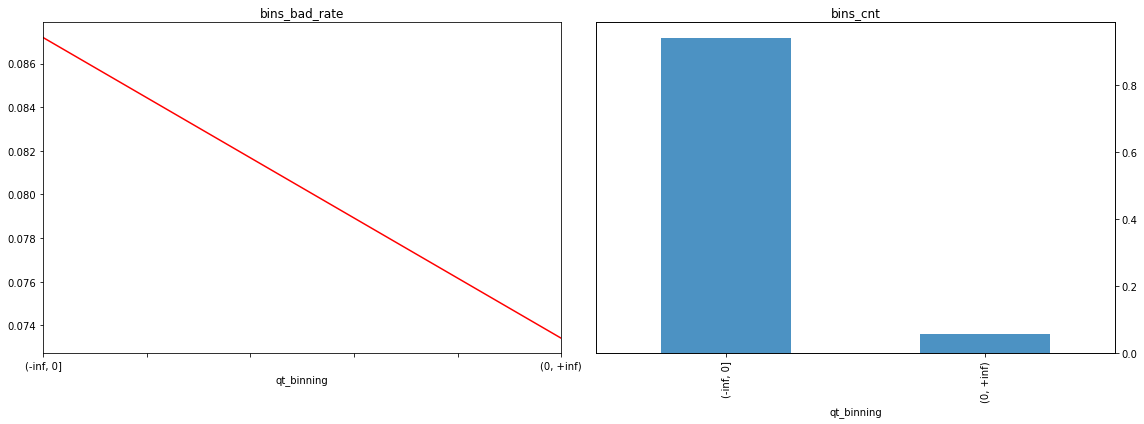

ld_rc 变量的IV值为 0.0018150530524518927


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,27592,0.941,2406,25186,0.949862,0.940162,0.087199,0.010264,0.000100
"(0, +inf)",1,1,1730,0.059,127,1603,0.050138,0.059838,0.073410,-0.176858,0.001715


In [25]:
var_name = 'ld_rc' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ld_rc=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


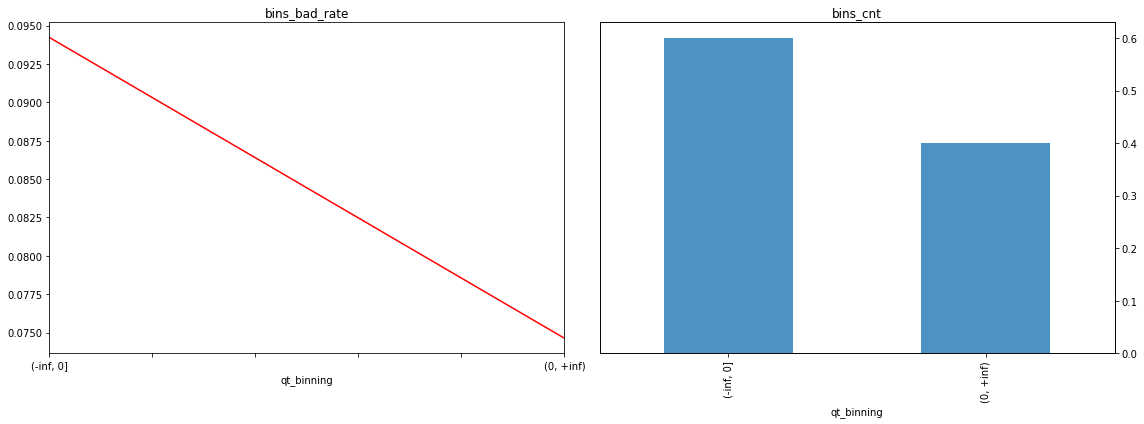

ld_xc 变量的IV值为 0.015184922377371339


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,17584,0.599686,1657,15927,0.654165,0.594535,0.094233,0.095580,0.005699
"(0, +inf)",1,1,11738,0.400314,876,10862,0.345835,0.405465,0.074629,-0.159073,0.009485


In [26]:
var_name = 'ld_xc' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ld_xc=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


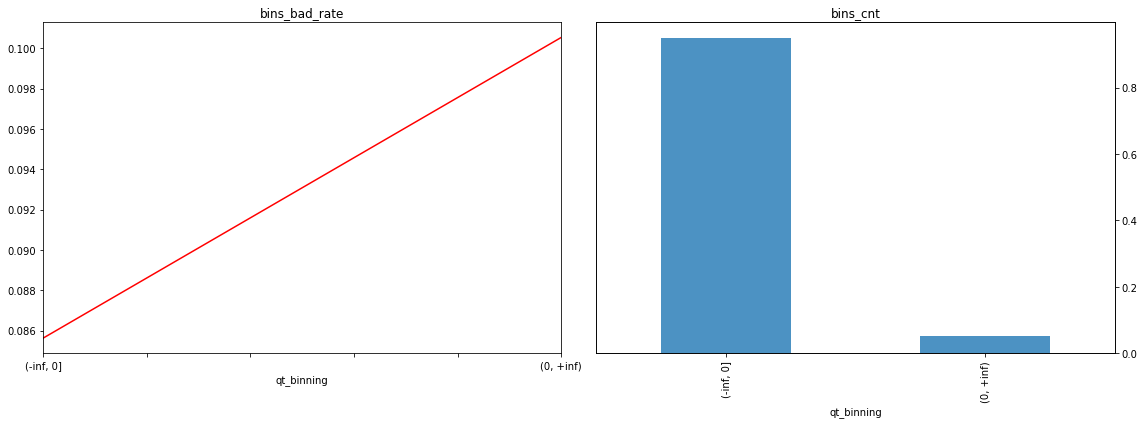

bs_gps5 变量的IV值为 0.0016250521538849114


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,27820,0.948776,2382,25438,0.940387,0.949569,0.085622,-0.009717,0.000089
"(0, +inf)",1,1,1502,0.051224,151,1351,0.059613,0.050431,0.100533,0.167266,0.001536


In [27]:
var_name = 'bs_gps5' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_bs_gps5=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


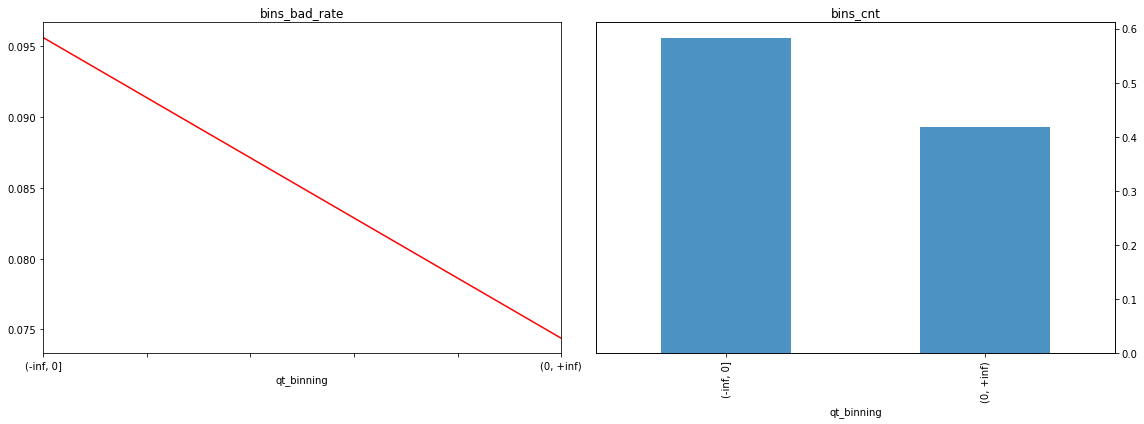

bs_add5 变量的IV值为 0.01791550980337108


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,14398,0.582373,1377,13021,0.641958,0.576712,0.095638,0.107180,0.006993
"(0, +inf)",1,1,10325,0.417627,768,9557,0.358042,0.423288,0.074383,-0.167403,0.010922


In [41]:
var_name = 'bs_add5' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_bs_add5=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


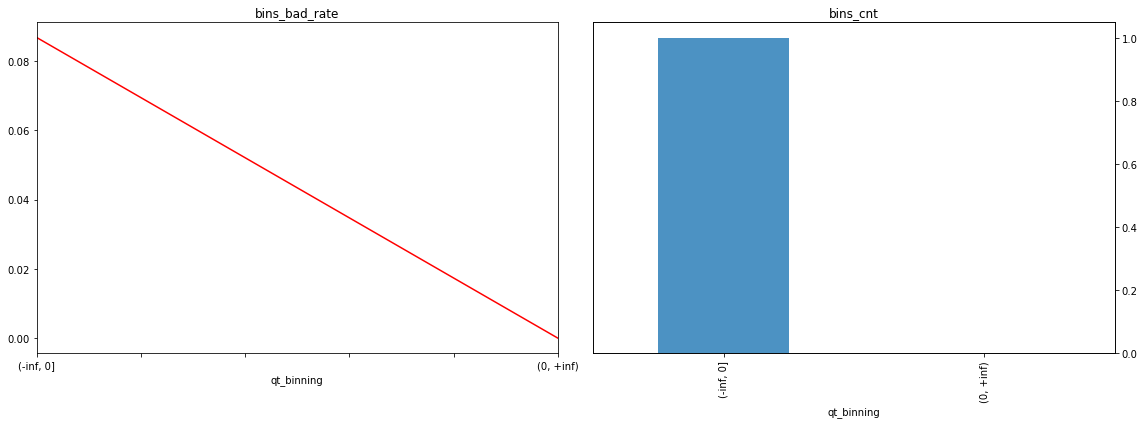

bd_addr_abn_apply 变量的IV值为 0.0017729415247932586


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,24716,0.999717,2145,22571,1.000000,0.99969,0.086786,0.000310,9.613742e-08
"(0, +inf)",1,1,7,0.000283,0,7,0.000001,0.00031,0.000000,-5.736689,1.772845e-03


In [42]:
var_name = 'bd_addr_abn_apply' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_bd_addr_abn_apply=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


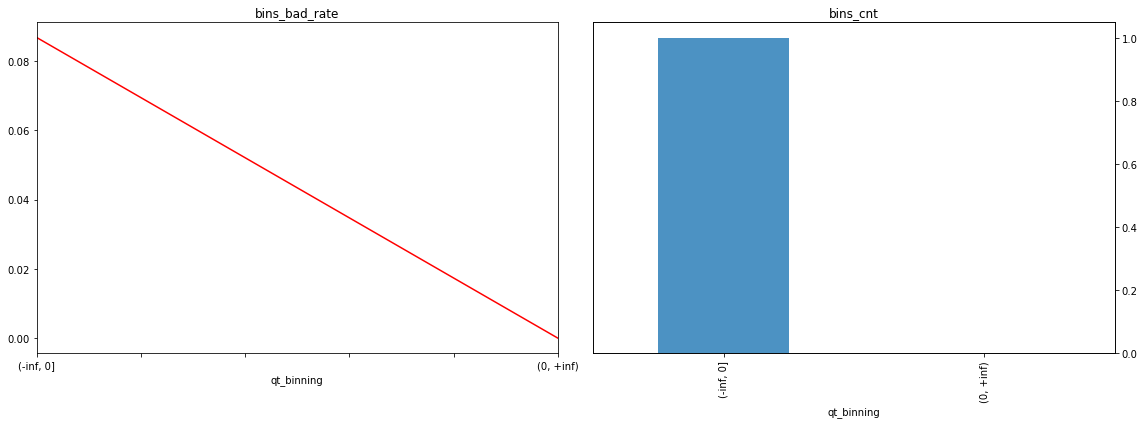

dist_gps5_abn_spend 变量的IV值为 0.0039809205264729475


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,24709,0.999434,2145,22564,1.000000,0.99938,0.08681,0.000620,3.846093e-07
"(0, +inf)",1,1,14,0.000566,0,14,0.000001,0.00062,0.00000,-6.429837,3.980536e-03


In [43]:
var_name = 'dist_gps5_abn_spend' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_dist_gps5_abn_beh=var_bin['WOE']
var_bin.sort_values('Lbound')

## 模型训练

In [176]:
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score

In [177]:
selected_var ={#'cs':[0,4,5,6,7],
               #'od':[0],
                'ls_od_b_1y':[0],
                'ls_od_b_2y':[0],
                #'ls_od_f_6t':[0],
               #'xc_behavior':[0],
               'xc_overloan':[0],
               'xc_overdue':[0],
               #'xc_record':[0],
               'rv':[0],
               'rc_idname_multi':[0],
                #'rc_relation_age':[0],
                #'rc_relation_multi':[0],
                'rc_relation_cnt':[0],
               'ls_cr':[0],
               'ls_cr_cl':[0],
               'ls_gp':[0],
               #'ls_gp_cl':[0],
               'ls_nd':[0],
               #'ld_rc':[0],
               'ld_xc':[0],
               'bs_gps5':[0]
              }

In [178]:
#WOE变换
WOE_train = WOE_mapping(data_form,selected_var, target)
train_X = WOE_train.drop(target, axis = 1)
train_X['constant'] = 1
train_Y = WOE_train[target]

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


In [179]:
logit = sm.Logit(train_Y, train_X).fit()
logit_params=logit.params
logit.summary()

Optimization terminated successfully.
         Current function value: 0.280056
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   type   No. Observations:                29322
Model:                          Logit   Df Residuals:                    29308
Method:                           MLE   Df Model:                           13
Date:                Tue, 03 Apr 2018   Pseudo R-squ.:                 0.04774
Time:                        16:54:44   Log-Likelihood:                -8211.8
converged:                       True   LL-Null:                       -8623.4
                                        LLR p-value:                1.419e-167
===================================================================================
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
ls_od_b_1y          0.7656      1.599      0.479      0.632        -2.369     3.900
ls_od_b_2y          0.4960      1.476      0.336      0.737        -2.397     3.389
xc_overloan         0.9540      0.055     17.502      0.000         0.847     1.061
xc_overdue          0.6805      0.256      2.660      0.008         0.179     1.182
rv                  0.7128      0.273      2.610      0.009         0.177     1.248
rc_idname_multi     0.5507      0.479      1.149      0.251        -0.389     1.491
rc_relation_cnt     0.5523      0.449      1.229      0.219        -0.328     1.433
ls_cr               0.6220      0.119      5.246      0.000         0.390     0.854
ls_cr_cl            0.7628      0.074     10.345      0.000         0.618     0.907
ls_gp               0.2162      0.499      0.433      0.665        -0.762     1.194
ls_nd               0.4010      0.086      4.663      0.000         0.232     0.570
ld_xc               0.6624      0.186      3.561      0.000         0.298     1.027
bs_gps5             1.1648      0.540      2.158      0.031         0.107     2.223
constant           -2.3587      0.022   -107.866      0.000        -2.402    -2.316
===================================================================================
"""

In [180]:
#KS值
predict_Y = logit.predict(train_X)
KS_calculation(train_Y,predict_Y, 40)

0.27089189653164686

In [181]:
#ROC值
roc_auc_score(train_Y,predict_Y)

0.66764083466269442

## 打分

In [182]:
import math
score_data=data_form[['type']]
score_data['probability'] = predict_Y

#风险odds=15:1时，基本分数为500分
#风险翻倍时，即odds=15:2时，分数降低50分
B = 50/math.log(2, math.e)
A = 500 + B * math.log(1/15,math.e)

score_data['odds'] = (score_data['probability']/(1-score_data['probability']) ).apply(lambda x: math.log(x, math.e))
score_data['score'] = A - B * score_data['odds']

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [183]:
score_data['score'].sum()/score_data.shape[0]

487.2743837057824

In [184]:
score_data[score_data['score']<=600].shape[0]

28760

In [185]:
score_data[score_data['score']<=560].shape[0]/score_data.shape[0]

0.8919241525134711

In [186]:
score_data[(score_data.score<=560) & (score_data.type==1)].shape[0]/score_data[score_data['score']<=560].shape[0]

0.0936412648644515

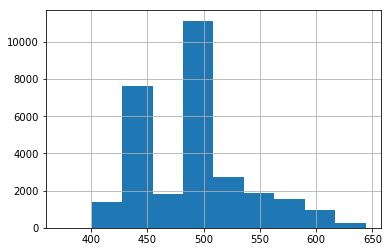

In [187]:
#分数区间
score_data.score.hist()
plt.show()

In [188]:
#分数分段
var_name = 'score' #变量
bins=[450,500,520,550]
var_bin = variable_binning(score_data, target, var_name, bins, 'bins')
#var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


In [189]:
def binning_plot(df):
    '''
    plot Y_rate and bin_percent curves
    '''
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    df['Y_rate'].plot()
    plt.title('bins_bad_rate')

    plt.subplot(122)
    df['PctTotal'].plot.bar(secondary_y=True,alpha = 0.8, grid = False)
    plt.title('bins_cnt')
    
    plt.tight_layout()
    plt.show()

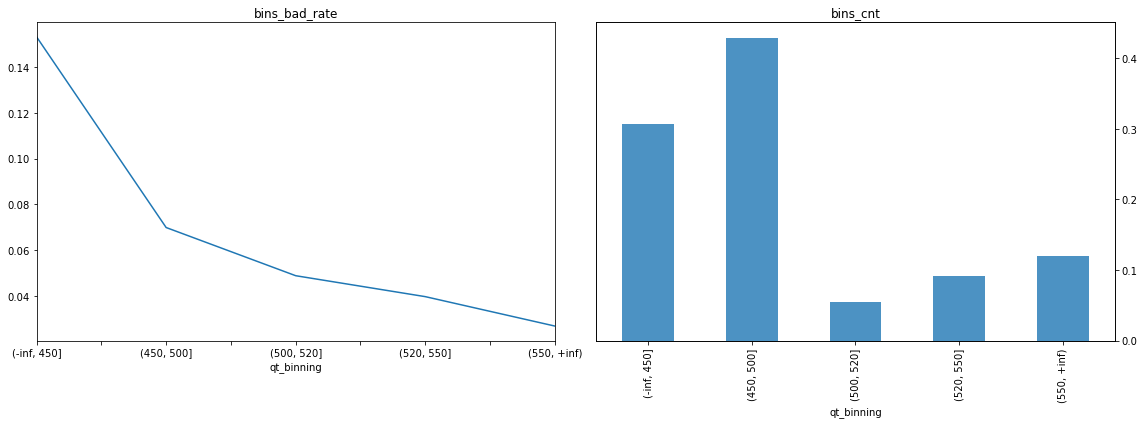

In [190]:
binning_plot(var_bin)

In [191]:
var_bin

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 450]",373.421028,447.506590,8975,0.306084,1375,7600,0.542835,0.283699,0.153203,0.648892,0.168151
"(450, 500]",450.774035,499.722803,12586,0.429234,880,11706,0.347414,0.436970,0.069919,-0.229348,0.020540
"(500, 520]",500.235554,519.993971,1596,0.054430,78,1518,0.030794,0.056665,0.048872,-0.609853,0.015778
"(520, 550]",520.036924,549.979575,2668,0.090990,106,2562,0.041848,0.095636,0.039730,-0.826517,0.044457
"(550, +inf)",550.065048,643.927263,3497,0.119262,94,3403,0.037110,0.127030,0.026880,-1.230531,0.110649


## 变量分组打分

In [192]:
selected_var ={#'cs':[0,4,5,6,7],
               #'od':[0],
                'ls_od_b_1y':[0],
                'ls_od_b_2y':[0],
                #'ls_od_f_6t':[0],
               #'xc_behavior':[0],
               'xc_overloan':[0],
               'xc_overdue':[0],
               #'xc_record':[0],
               'rv':[0],
               'rc_idname_multi':[0],
               # 'rc_relation_age':[0],
                #'rc_relation_multi':[0],
                'rc_relation_cnt':[0],
               'ls_cr':[0],
               'ls_cr_cl':[0],
               'ls_gp':[0],
               #'ls_gp_cl':[0],
               'ls_nd':[0],
               #'ld_rc':[0],
               'ld_xc':[0],
               'bs_gps5':[0]
              }
#各变量分组的WOE集合放在一个字典中
def var_woe_result(df, target, select_var):
    output_df = select_var
    var_list = list(select_var.keys())
    for i in var_list:
        output_df[i] = variable_binning(df, target, i,select_var.get(i), 'bins')['WOE'] #select_var.get(i)返回字典中键的关联值即分组的切割值bin
    return output_df

var_woe_result=var_woe_result(data_form,target,selected_var)

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


In [193]:
#乘以模型参数得出变量分
variable_score=var_woe_result
var_list = list(var_woe_result.keys())
for i in var_list:
    variable_score[i] = var_woe_result.get(i)*logit_params[i]*B*(-1)

In [194]:
variable_score

{'bs_gps5': qt_binning
 (-inf, 0]     0.816410
 (0, +inf)   -14.054005
 Name: WOE, dtype: float64, 'ld_xc': qt_binning
 (-inf, 0]   -4.567315
 (0, +inf)    7.601333
 Name: WOE, dtype: float64, 'ls_cr': qt_binning
 (-inf, 0]    -2.175495
 (0, +inf)    51.805002
 Name: WOE, dtype: float64, 'ls_cr_cl': qt_binning
 (-inf, 0]    -9.776890
 (0, +inf)    52.885746
 Name: WOE, dtype: float64, 'ls_gp': qt_binning
 (-inf, 0]   -0.105915
 (0, +inf)    4.772574
 Name: WOE, dtype: float64, 'ls_nd': qt_binning
 (-inf, 0]    -3.846539
 (0, +inf)    25.674229
 Name: WOE, dtype: float64, 'ls_od_b_1y': qt_binning
 (-inf, 0]     0.031592
 (0, +inf)   -24.800567
 Name: WOE, dtype: float64, 'ls_od_b_2y': qt_binning
 (-inf, 0]     0.018351
 (0, +inf)   -20.279961
 Name: WOE, dtype: float64, 'rc_idname_multi': qt_binning
 (-inf, 0]     0.272921
 (0, +inf)   -10.173502
 Name: WOE, dtype: float64, 'rc_relation_cnt': qt_binning
 (-inf, 0]    0.378228
 (0, +inf)   -8.827958
 Name: WOE, dtype: float64, 'rv': qt_b

In [195]:
logit_params['constant']*B

-170.14188816238402

## 模型基础分数

In [196]:
base_score=A-logit_params['constant']*B
base_score

474.79735838195808

In [197]:
B

72.13475204444818

In [198]:
A

304.65547021957406

In [199]:
#打分详情下载
import math
score_data1=data_form[['type',
                'ls_od_b_1y',
                'ls_od_b_2y',
               'xc_overloan',
               'xc_overdue',
               'rv',
               'rc_idname_multi',
                'rc_relation_cnt',
               'ls_cr',
               'ls_cr_cl',
               'ls_gp',
               'ls_nd',
               'ld_xc',
               'bs_gps5']]
score_data1['probability'] = predict_Y

#风险odds=15:1时，基本分数为660分
#风险翻倍时，即odds=15:2时，分数降低50分
B = 50/math.log(2, math.e)
A = 500 + B * math.log(1/15,math.e)

score_data1['odds'] = (score_data['probability']/(1-score_data['probability']) ).apply(lambda x: math.log(x, math.e))
score_data1['score'] = A - B * score_data['odds']

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

## 低分段人群的规则命中情况

In [200]:
#低分段人群的规则命中分布
columns1=list(score_data1.columns)
rules1=pd.Series(index=columns1)
for i in columns1:  
         rules1[i]=score_data1[(score_data1.score<=450)& (score_data1[i]==1) ].shape[0]/score_data1[score_data1['score']<=450].shape[0]

In [201]:
rules

type               0.153203
ls_od_b_1y         0.001448
ls_od_b_2y         0.001226
xc_overloan        0.999443
xc_overdue         0.084457
rv                 0.066184
rc_idname_multi    0.029304
rc_relation_cnt    0.050808
ls_cr              0.000000
ls_cr_cl           0.000111
ls_gp              0.011588
ls_nd              0.001448
ld_xc              0.295710
bs_gps5            0.057382
probability        0.000000
odds               0.000000
score              0.000000
dtype: float64

In [202]:
#低分段人群的规则命中时的bad_rate
columns1=list(score_data1.columns)
rules2=pd.Series(index=columns1)
for i in columns1:
    if(score_data1[(score_data1.score<=450)& (score_data1[i]==1) ].shape[0]==0):
        rules2[i]=0
    else:
         rules2[i]=score_data1[(score_data1.score<=450)& (score_data1[i]==1)& (score_data1.type==1)].shape[0]/score_data1[(score_data1.score<=450)& (score_data1[i]==1) ].shape[0]

In [203]:
rules2

type               1.000000
ls_od_b_1y         0.230769
ls_od_b_2y         0.181818
xc_overloan        0.153066
xc_overdue         0.164908
rv                 0.136364
rc_idname_multi    0.155894
rc_relation_cnt    0.160088
ls_cr              0.000000
ls_cr_cl           0.000000
ls_gp              0.134615
ls_nd              0.000000
ld_xc              0.150339
bs_gps5            0.149515
probability        0.000000
odds               0.000000
score              0.000000
dtype: float64

In [204]:
#详情下载
score_data1.to_csv('score_data1.csv')

## 高分段人数

In [205]:
#低分段人群的规则命中分布
columns3=list(score_data1.columns)
rules3=pd.Series(index=columns1)
for i in columns1:  
         rules3[i]=score_data1[(score_data1.score>450)& (score_data1[i]==1) ].shape[0]/score_data1[score_data1['score']>450].shape[0]

In [206]:
rules3

type               0.056913
ls_od_b_1y         0.000885
ls_od_b_2y         0.000491
xc_overloan        0.163120
xc_overdue         0.058338
rv                 0.060500
rc_idname_multi    0.020937
rc_relation_cnt    0.031602
ls_cr              0.091709
ls_cr_cl           0.326633
ls_gp              0.030373
ls_nd              0.265641
ld_xc              0.446454
bs_gps5            0.048508
probability        0.000000
odds               0.000000
score              0.000000
dtype: float64

## 测试样本

In [215]:
data_test = pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variable0403_2.csv')
data_test.shape

(4241, 35)

In [216]:
#样本的bad_rate
data_test[data_test['type']==1].shape[0]/data_test.shape[0]

0.02428672482904975

### 测试样本区隔力KS

In [217]:
selected_var ={#'cs':[0,4,5,6,7],
               #'od':[0],
                'ls_od_b_1y':[0],
                'ls_od_b_2y':[0],
                #'ls_od_f_6t':[0],
               #'xc_behavior':[0],
               'xc_overloan':[0],
               'xc_overdue':[0],
               #'xc_record':[0],
               'rv':[0],
               'rc_idname_multi':[0],
                #'rc_relation_age':[0],
                #'rc_relation_multi':[0],
                'rc_relation_cnt':[0],
               'ls_cr':[0],
               'ls_cr_cl':[0],
               'ls_gp':[0],
               #'ls_gp_cl':[0],
               'ls_nd':[0],
               #'ld_rc':[0],
               'ld_xc':[0],
               'bs_gps5':[0]
              }
#WOE变换
WOE_test = WOE_mapping(data_test,selected_var, target)
test_X = WOE_test.drop(target, axis = 1)
test_X['constant'] = 1
test_Y = WOE_test[target]

#KS值
predict_test_Y = logit.predict(test_X)
KS_calculation(test_Y,predict_test_Y, 40)

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


0.20529358491274441

In [218]:
roc_auc_score(test_Y,predict_test_Y)

0.61266171453776741

## 测试样本分数分布

In [219]:
import math
score_test=data_test[['type']]
score_test['probability'] = predict_test_Y

#风险odds=15:1时，基本分数为660分
#风险翻倍时，即odds=15:2时，分数降低50分
B = 50/math.log(2, math.e)
A = 500 + B * math.log(1/15,math.e)

score_test['odds'] = (score_test['probability']/(1-score_test['probability']) ).apply(lambda x: math.log(x, math.e))
score_test['score'] = A - B * score_test['odds']

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [220]:
#分数分段
var_bin_test = variable_binning(score_test, target, var_name, bins, 'bins')
#var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


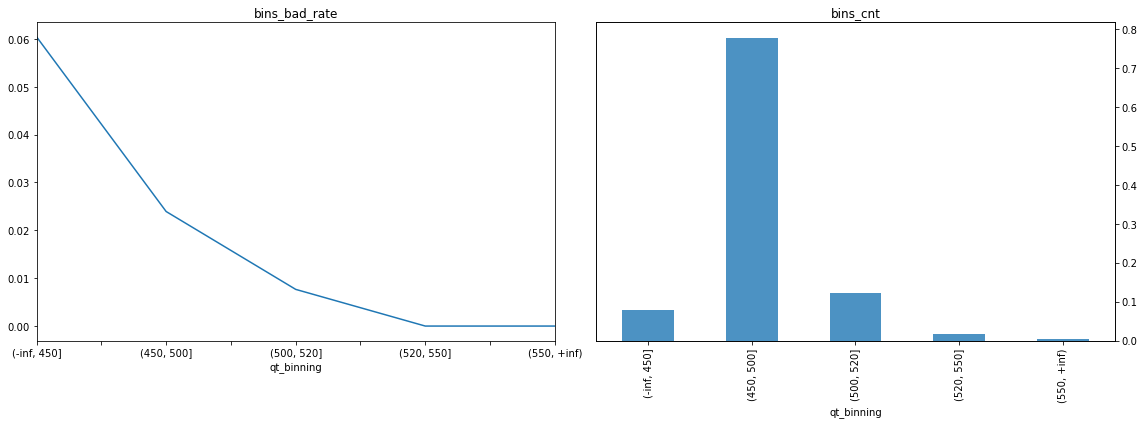

In [221]:
binning_plot(var_bin_test)

In [222]:
var_bin_test

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 450]",-inf,448.931677,331,0.078048,20,311,0.194175,0.075157,0.060423,0.949178,0.112969
"(450, 500]",452.364574,495.520333,3301,0.778354,79,3222,0.766990,0.778637,0.023932,-0.015071,0.000176
"(500, 520]",506.711291,518.843955,522,0.123084,4,518,0.038835,0.125181,0.007663,-1.170442,0.101063
"(520, 550]",524.996676,537.129340,70,0.016506,0,70,0.000001,0.016916,0.000000,-9.736038,0.164689
"(550, +inf)",737.547742,870.727638,17,0.004008,0,17,0.000001,0.004108,0.000000,-8.320756,0.034176


## 测试样本稳定性PSI

In [223]:
def model_psi(var_bin,var_bin_test):
    PSI_in=pd.DataFrame()
    PSI_in['Y_pct1']=var_bin.PctTotal
    PSI_in['Y_pct2']=var_bin_test.PctTotal
    psi_result=pd.DataFrame()
    psi_result['rate1'] = (PSI_in['Y_pct1']/PSI_in['Y_pct2']).map(lambda x:log(x))
    psi_result['rate2'] = (PSI_in['Y_pct1'] - PSI_in['Y_pct2']) * psi_result['rate1']
    psi = psi_result['rate2'].sum()
    return psi_result

In [224]:
psi_result=model_psi(var_bin,var_bin_test)
psi = psi_result['rate2'].sum()
psi

1.0936214410981218

In [225]:
var_bin.PctTotal

qt_binning
(-inf, 450]    0.306084
(450, 500]     0.429234
(500, 520]     0.054430
(520, 550]     0.090990
(550, +inf)    0.119262
Name: PctTotal, dtype: float64

In [226]:
var_bin_test.PctTotal

qt_binning
(-inf, 450]    0.078048
(450, 500]     0.778354
(500, 520]     0.123084
(520, 550]     0.016506
(550, +inf)    0.004008
Name: PctTotal, dtype: float64

In [227]:
psi_result['rate2']

qt_binning
(-inf, 450]    0.311621
(450, 500]     0.207789
(500, 520]     0.056018
(520, 550]     0.127148
(550, +inf)    0.391045
Name: rate2, dtype: float64

## 诺亚点点数据测试

In [156]:
data_tg = pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_daihou_test_0326.csv')
#data_tg['type']=1 #加个常数项做type列，方便后面调用函数运算
data_tg.shape

(4565, 15)

In [157]:
#样本的bad_rate
data_tg[data_tg['type']==1].shape[0]/data_tg.shape[0]

0.07097480832420591

In [158]:
data_tg[data_tg['type']==1].shape[0]

324

In [165]:
bins_tg =[450,500,520,550]
var_bin_tg = variable_binning(data_tg, target, var_name, bins_tg, 'bins')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


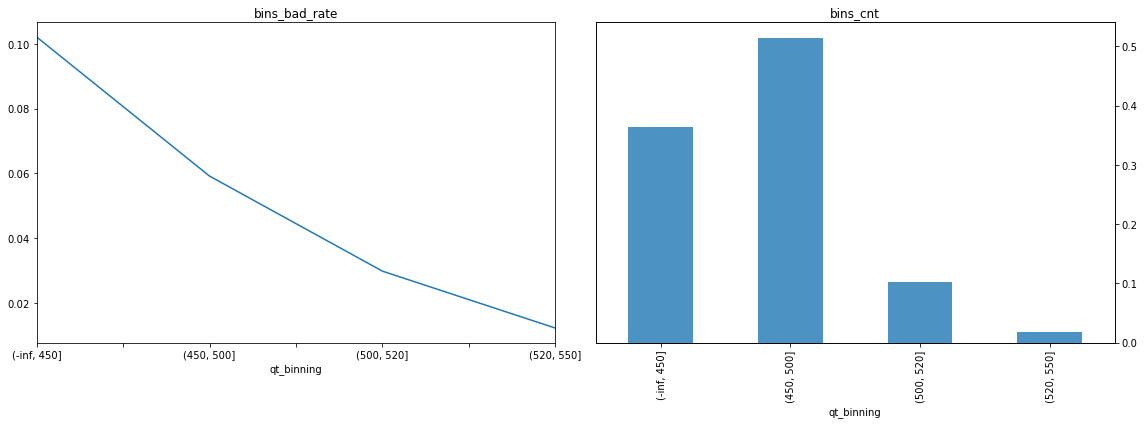

In [166]:
binning_plot(var_bin_tg)

In [167]:
var_bin_tg

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 450]",409,442,1664,0.364513,170,1494,0.524691,0.352275,0.102163,0.398397,0.068690
"(450, 500]",452,498,2349,0.514567,139,2210,0.429012,0.521104,0.059174,-0.194463,0.017908
"(500, 520]",502,519,470,0.102957,14,456,0.043210,0.107522,0.029787,-0.911625,0.058628
"(520, 550]",527,543,82,0.017963,1,81,0.003086,0.019099,0.012195,-1.822638,0.029186


In [168]:
psi_result=model_psi(var_bin,var_bin_tg)
psi = psi_result['rate2'].sum()
psi

0.17509378282699134

In [78]:
4565/533519

0.008556396304536484

In [169]:
selected_var ={#'cs':[0,4,5,6,7],
               #'od':[0],
                'ls_od_b_1y':[0],
                'ls_od_b_2y':[0],
                #'ls_od_f_6t':[0],
               #'xc_behavior':[0],
               'xc_overloan':[0],
               'xc_overdue':[0],
               #'xc_record':[0],
               'rv':[0],
               'rc_idname_multi':[0],
                #'rc_relation_age':[0],
                #'rc_relation_multi':[0],
                'rc_relation_cnt':[0],
               'ls_cr':[0],
               'ls_cr_cl':[0],
               'ls_gp':[0],
               #'ls_gp_cl':[0],
               'ls_nd':[0],
               #'ld_rc':[0],
               'ld_xc':[0],
               'bs_gps5':[0]
              }
#WOE变换
WOE_tg = WOE_mapping(data_tg,selected_var, target)
tg_X = WOE_tg.drop(target, axis = 1)
tg_X['constant'] = 1
tg_Y = WOE_tg[target]

#KS值
predict_tg_Y = logit.predict(tg_X)
KS_calculation(tg_Y,predict_tg_Y, 40)

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


0.18182658410985086

In [170]:
roc_auc_score(tg_Y,predict_tg_Y)

0.62176875649523611

## 算话评分测试

In [142]:
data_sh = pd.read_csv('D:\\python\\huabao\\tmp_suanhua_test0326.csv')
#data_tg['type']=1 #加个常数项做type列，方便后面调用函数运算
data_sh.shape

(4156, 5)

In [143]:
#样本的bad_rate
data_sh[data_sh['type']==1].shape[0]/data_sh.shape[0]

0.1737247353224254

In [144]:
data_sh[data_sh['type']==1].shape[0]

722

In [153]:
bins_sh =[500,530,540,550,560,580]
var_sh1='score1'
var_bin_sh1 = variable_binning(data_sh, target, var_sh1, bins_sh, 'bins')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


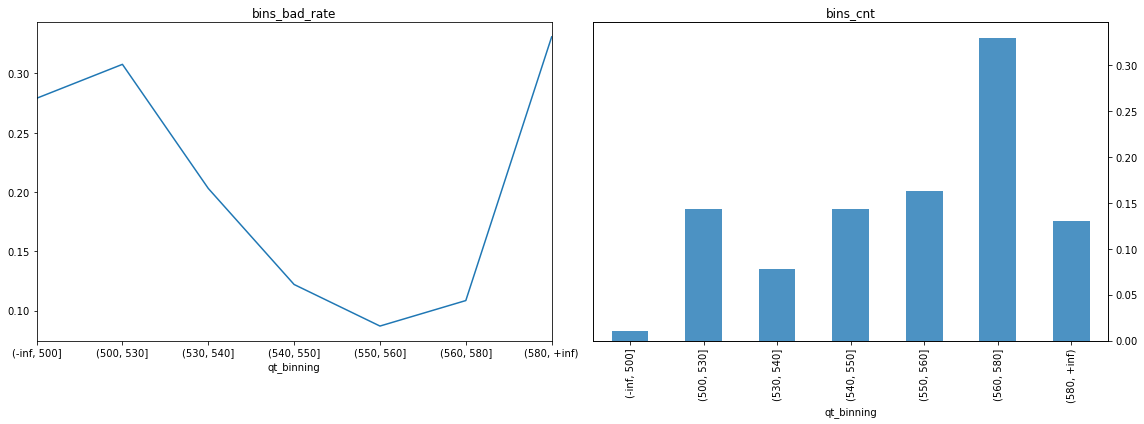

In [154]:
binning_plot(var_bin_sh1)

In [155]:
var_bin_sh1

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 500]",488,500,43,0.010346,12,31,0.016620,0.009027,0.279070,0.610375,0.004635
"(500, 530]",501,530,598,0.143888,184,414,0.254848,0.120559,0.307692,0.748526,0.100518
"(530, 540]",531,540,325,0.078200,66,259,0.091413,0.075422,0.203077,0.192283,0.003075
"(540, 550]",541,550,598,0.143888,73,525,0.101108,0.152883,0.122074,-0.413483,0.021408
"(550, 560]",551,560,678,0.163138,59,619,0.081717,0.180256,0.087021,-0.791112,0.077955
"(560, 580]",561,580,1373,0.330366,149,1224,0.206371,0.356436,0.108521,-0.546477,0.082007
"(580, +inf)",581,607,541,0.130173,179,362,0.247922,0.105416,0.330869,0.855197,0.121871


## score2

In [148]:
#bins_sh =[530,540,550,560,600]
bins_sh =[500,530,540,550,560,580,600]
var_sh2='score2'
var_bin_sh2 = variable_binning(data_sh, target, var_sh2, bins_sh, 'bins')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


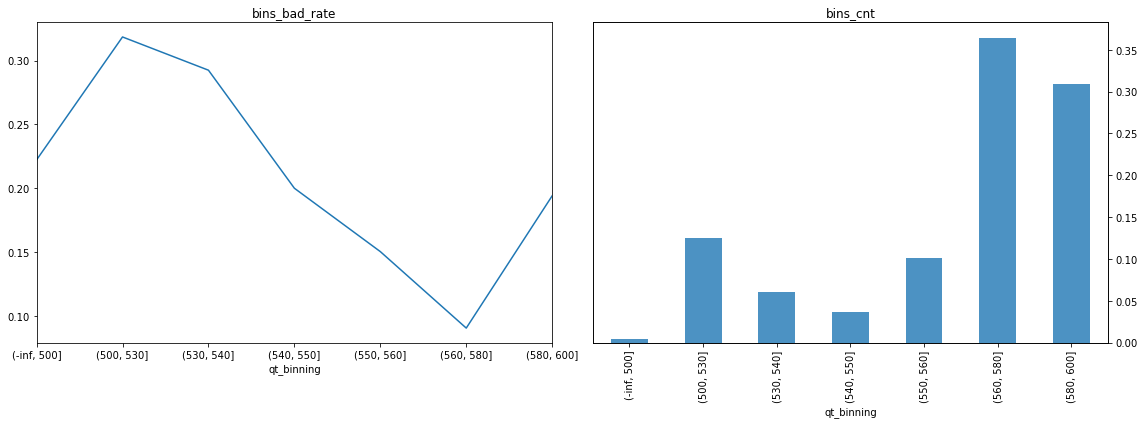

In [149]:
binning_plot(var_bin_sh2)

In [151]:
var_bin_sh2

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 500]",500,500,18,0.004331,4,14,0.005540,0.004077,0.222222,0.306693,0.000449
"(500, 530]",504,530,518,0.124639,165,353,0.228532,0.102796,0.318533,0.798933,0.100455
"(530, 540]",531,540,253,0.060876,74,179,0.102493,0.052126,0.292490,0.676135,0.034055
"(540, 550]",541,550,150,0.036092,30,120,0.041551,0.034945,0.200000,0.173162,0.001144
"(550, 560]",551,560,419,0.100818,63,356,0.087258,0.103669,0.150358,-0.172340,0.002828
"(560, 580]",561,580,1515,0.364533,137,1378,0.189751,0.401281,0.090429,-0.748952,0.158426
"(580, 600]",581,600,1283,0.308710,249,1034,0.344875,0.301107,0.194076,0.135719,0.005940


In [152]:
var_bin_sh2.Totalcnt.sum()

4156